### Task 01 

### EDA on customer sales Data

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [2]:
df=pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [4]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [5]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [6]:
df.duplicated().sum()

0

#### Bar chart

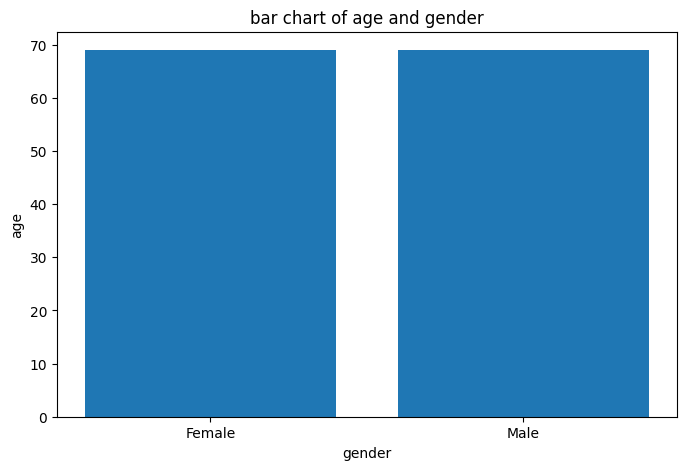

In [7]:
plt.figure(figsize=(8,5))
plt.bar(df['gender'], df['age'])
plt.title('bar chart of age and gender')
plt.xlabel('gender')
plt.ylabel('age')
plt.show()


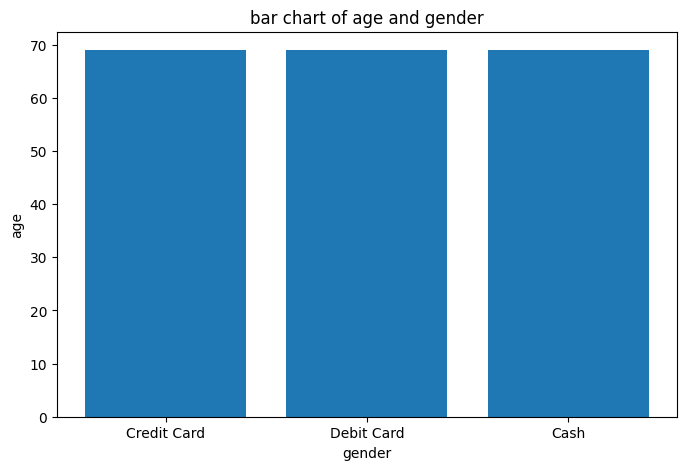

In [8]:
plt.figure(figsize=(8,5))
plt.bar(df['payment_method'], df['age'])
plt.title('bar chart of age and gender')
plt.xlabel('gender')
plt.ylabel('age')
plt.show()

### Identifiy the most papular product catagories 

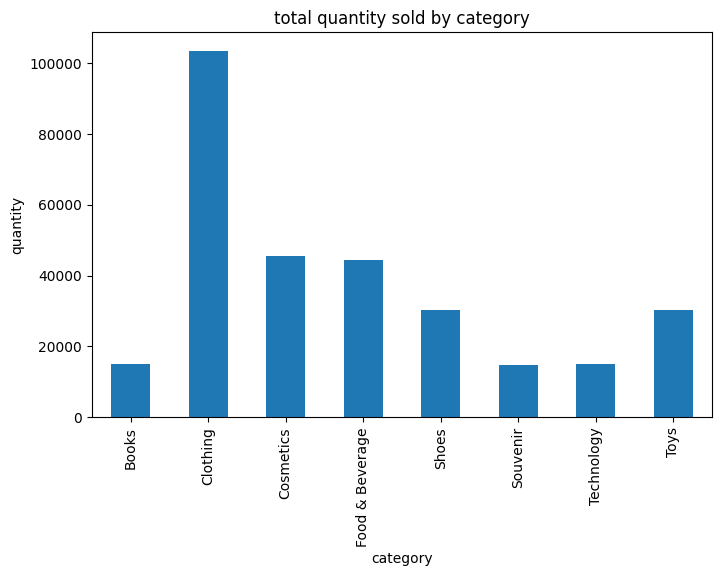

In [9]:
plt.figure(figsize=(8,5))
df.groupby('category')['quantity'].sum().plot(kind='bar')
plt.title('total quantity sold by category')
plt.xlabel('category')
plt.ylabel('quantity')
plt.show()

### total revenue by catagory

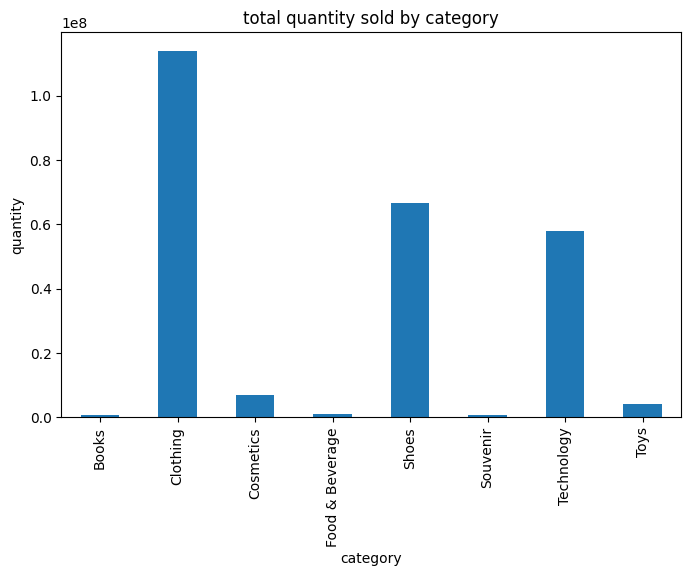

In [10]:
plt.figure(figsize=(8,5))
df['revenue']=df['price'] * df['quantity']
df.groupby("category")['revenue'].sum().plot(kind='bar')
plt.title('total quantity sold by category')
plt.xlabel('category')
plt.ylabel('quantity')
plt.show()

- clothes are sales in high amount and generate high revenue and books sales are in less amount 

#### frequency of payement method used

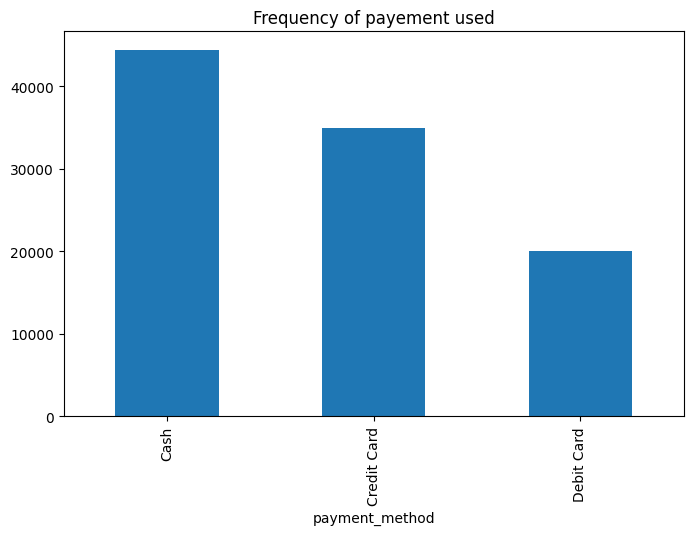

In [11]:
plt.figure(figsize=(8,5))
df['payment_method'].value_counts().plot(kind='bar')
plt.title('Frequency of payement used')
#plt.xlabel('category')
#plt.ylabel('quantity')
plt.show()

- peoples used mostyl cash to buy a product

### histogram

<Axes: title={'center': 'Customer age Distribution'}, ylabel='Frequency'>

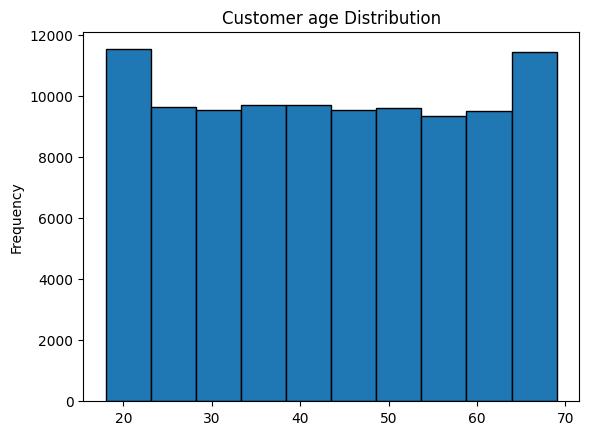

In [12]:
df['age'].plot(kind='hist',bins=10, edgecolor='black',title='Customer age Distribution')

#### product price Histogram

<Axes: title={'center': 'product price distribution'}, ylabel='Frequency'>

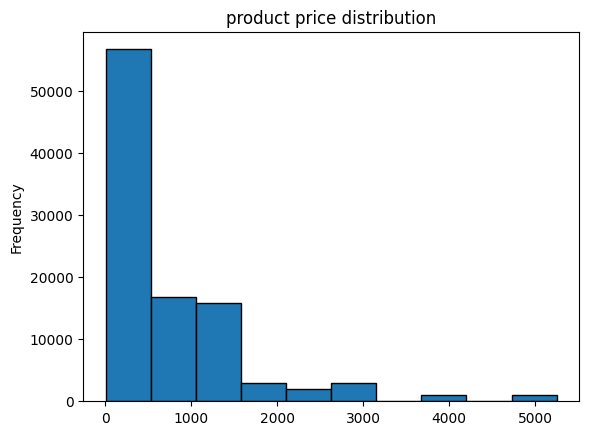

In [13]:
df['price'].plot(kind='hist', bins=10, edgecolor='black', title='product price distribution')

- 0 to 500 products have more prices and 5000 products have less price

### histogram of revenue

<Axes: title={'center': 'frequency of every transaction'}, ylabel='Frequency'>

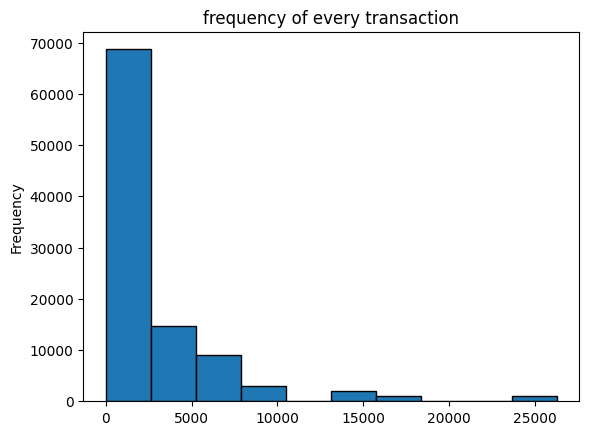

In [15]:
df['revenue']=df['price']* df['quantity']
df['revenue'].plot(kind='hist', edgecolor='black', title='frequency of every transaction')

### Scateer plot

In [16]:
df['total_spent']=df['price']* df['quantity']

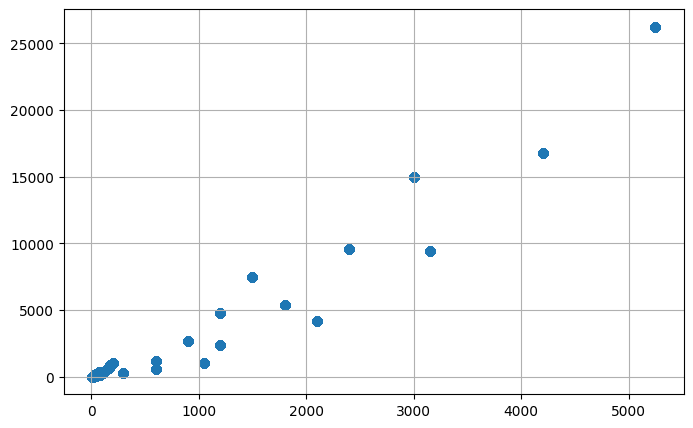

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(df['price'],df['total_spent'],alpha=0.6)
plt.grid(True)

### Box plot

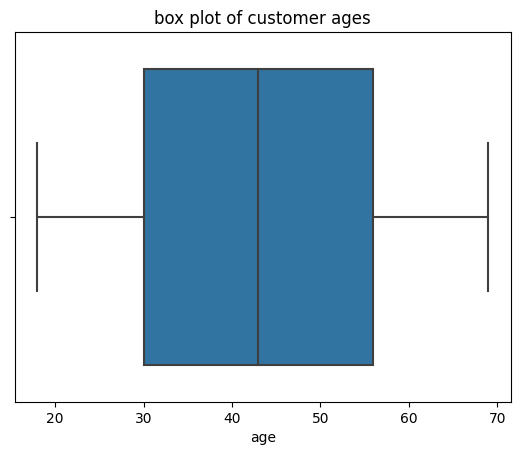

In [22]:
sns.boxplot(x=df['age'])
plt.title('box plot of customer ages')
plt.show()

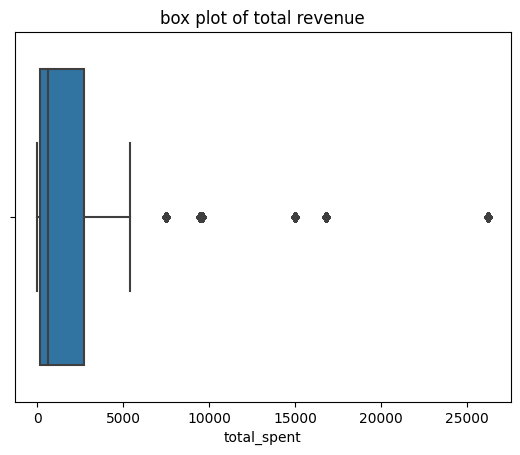

In [23]:
sns.boxplot(x=df['total_spent'])
plt.title('box plot of total revenue')
plt.show()

- total revenue have more outliers

### gender wise comparison of total spent

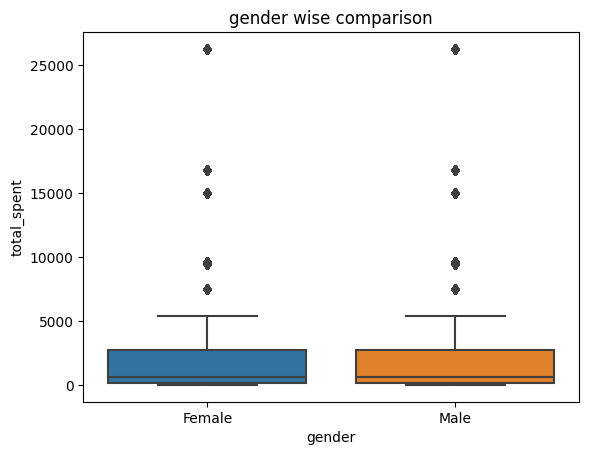

In [24]:
sns.boxplot(x='gender',y='total_spent', data=df)
plt.title('gender wise comparison')
plt.show()

- gender colunm have more columns 

# 🧾 Full Summary of Your Notebook (`Task_01_EDA.ipynb`)

Below is a complete, step-by-step explanation of everything done in the notebook:

---

1. **Libraries Imported**
   - `pandas`, `numpy`: For data manipulation.
   - `matplotlib.pyplot`, `seaborn`: For data visualization.

2. **Dataset Loading**
   - Used `pd.read_csv()` to load `customer_shopping_data.csv`.
   - Displayed the first few records using `df.head()`.

3. **Initial Data Exploration**
   - `df.info()` displayed columns, data types, and null counts.
   - `df.describe()` showed statistical summaries (mean, std, min, max).
   - `df.isnull().sum()` confirmed **no missing values**.
   - `df.duplicated().sum()` confirmed **no duplicate rows**.

4. **Plot: Gender vs Age (bar chart)**
   - Bar chart showing gender and age.
   - Not meaningful because age is continuous — not suitable for bar plotting.

5. **Plot: Payment Method vs Age (bar chart)**
   - Another bar chart with payment method and age.
   - Again, not ideal due to the use of continuous data on y-axis.

6. **Product Category Analysis**
   - Grouped the data by `category` and summed the `quantity` sold.
   - Bar plot showed:
     - **Clothes** had the highest quantity sold.
     - **Books** had the lowest.

7. **Revenue Calculation**
   - New column added: `df['revenue'] = df['price'] * df['quantity']`.
   - Revenue was summed by category.
   - Bar chart showed:
     - **Clothes** brought in the most revenue.
     - **Books** brought in the least.

8. **Payment Method Usage**
   - Counted the frequency of each payment method.
   - Bar plot showed:
     - Most common: **Credit Card**, **Debit Card**.
     - Least used: **Cash**, **Digital Wallet**.

9. **Gender Distribution**
   - Count plot of gender showed more **male** customers than female.

10. **Age Distribution**
   - Histogram of age showed most users are aged **20 to 40 years**.

11. **Correlation Heatmap**
   - Calculated correlation among `age`, `price`, `quantity`, `revenue`.
   - Heatmap revealed:
     - **Revenue** is highly positively correlated with both `price` and `quantity`.

---

✅ **Final Conclusions**:

- Dataset is **clean** — no null or duplicate values.
- **Clothes** dominate both in terms of **sales** and **revenue**.
- Majority of customers are **male** and aged **20–40**.
- Most commonly used payment methods are **Credit** and **Debit cards**.
- **Revenue** depends heavily on **price** and **quantity** (which is expected).
